# Support Vector Machine (SVM)

## 1.  Maximal Margin Classifier

### 1.1 Hyperplane

- 1 dimension is a line, hyperplane is a dot
- 2 dimension is a plane, hyperplane is a line
- 3 dimension is a 3d space, hyperplane is a plane
- $p$ dimension space, hyperplane is $p-1$ dimension

![hyperplane](fig/hyper.png)

Mathematically, 

- if we have a $p$ dimensional data point $X=[X_1, X_2, ..., X_p]^T$ in $p$ dimensional space, 
- if $X$ lies on a hyperplane($p-1$ dimension) it must satisfied $b + w_1 X_1 + ... + w_p X_p = 0$
- if $X$ lies on one side of a hyperplane, $b + w_1 X_1 + ... + w_p X_p > 0$
- if $X$ lies on the other side of a hyperplane, $b + w_1 X_1 + ... + w_p X_p < 0$

<img src="fig/hyper3.PNG" alt="Drawing" style="width: 300px;"/>
e.g.

- hyperplane: $1+2X_1+3X_2=0$
- blue region: $1+2X_1+3X_2>0$
- purple region: $1+2X_1+3X_2<0$


### 1.2 Classification with Hyperplane

suppose using training data we got a hyperplane: $[b, w_1, w_2, ..., w_p]$

test data point $X, y$

- if $y = 1$, then $b + w^T X > 0$， 
- if $y = -1$, then $b + w^T X < 0$

<img src="fig/hyper_class1.PNG" alt="Drawing" style="width: 300px;"/>

SOME PROPERTIES:

- If a point is in the right side of hyperplane and far from it
    - $y(b + w^T X)$ will be large
    - we have high confidence about our assignment on $X$

- Classification based on hyperplane gives us linear classifier
- If we change $b$ to $2b$, $[w_1, w_2, ... w_p]$ to $2[w_1, w_2, ... w_p]$, sign of $y(b + w^T X)$ will not change(scaling property)

#### problem

Given train data, we could have multiple choice on hpyperplane, which one is best?

<img src="fig/hyper_class2.PNG" alt="Drawing" style="width: 300px;"/>

### 1.3 Maximal Margin Classifier

- Margin: the minimal distance from the observations to the hyperplane, and is known as the margin.
    - smallest $\hat{M} = y(b+w^T X)$ called functional margin
    - smallest $M = \frac{\hat{M}}{|w|} = y(\frac{b}{|w|}+\frac{w^T}{|w|} X)$ called geometric margin
    - if $|w| = 1$, functional margin is geometric margin
    - geometric margin represents the distance between point $X$ and hyperplane
- Maximal margin hyperplane: a hyperplane that has the largest margin
- Maximal margin classifier: classifier based on maximal margin hyperplane

<img src="fig/hyper_class3.PNG" alt="Drawing" style="width: 700px;"/>

#### How to find such a hyperplane

optimization problem: 

- objective
    - maximize geometric margin
- constrains
    - points on correct side, with geometric margin at least $M$
    - guarantee functional margin equals to the geometric margin

optimization problem with math: 

- objective
    - $\text{max }_{w, b} M$
- constrains
    - $y_i (w^T x_i + b) \geq M, i = 1, ..., n$
    - $|w| = 1$ 

<img src="fig/margin.PNG" alt="Drawing" style="width: 300px;"/>

#### Trick 1: use functional margin instead of geometric margin

WHY: remove constraint $|w| = 1$ to solve more easily

optimization problem: 

- objective
    - $\text{max }_{w, b} \frac{\hat{M}}{|w|}$
- constrains
    - $y_i (w^T x_i + b) \geq \hat{M}, i = 1, ..., n$



#### Trick 2: use scaling property we scale $\hat{M}$ to 1

WHY: scale $\hat{M}$ to 1 to solve more easily

optimization problem: 

- objective
    - $\text{max }_{w, b} \frac{1}{|w|}$
- constrains
    - $y_i (w^T x_i + b) \geq 1, i = 1, ..., n$


#### Trick 3: maximize $\frac{1}{|w|}$ is same as minmize $\frac{|w|^2}{2}$

WHY: $\frac{\hat{M}}{|w|}$ is not convex

**PRIMAL** optimization problem(quadratic programming problem): 

- objective
    - $\text{min }_{w, b} \frac{|w|^2}{2}$
- constrains
    - $y_i (w^T x_i + b) \geq 1, i = 1, ..., n$

#### Trick 4: using lagrange duality

WHY: sometimes dual problem is more easier to solve

**DUAL** optimization problem
- objective
    - $\text{max}_\alpha W(\alpha) = \sum_{i=1}^{n}\alpha_i - \frac{1}{2}\sum_{i,j=1}^{m}y_i y_j \alpha_i \alpha_j <x_i, x_j>$
- constrains
    - $\alpha_i \geq 0$
    - $\sum_{i=1}^{m}\alpha_i y_i = 0$

where $w = \sum_{i}\alpha_i y_i x_i$, and $w^Tx + b = \sum_{i}\alpha_i y_i <x_i, x> + b$

## 2.  Support Vector Classifier

### 2.1 Non-separable Case

- the right figure is non-separable case
- but if we tolerate some points inside the margin or even locate in the wrong side, we can build a classifier that
    - Greater robustness to individual observations, and
    - Better classification of most of the training observations.

<img src="fig/non-seperate.PNG" alt="Drawing" style="width: 700px;"/>

### 2.2 Support Vector Classifier

We can modify the classifier we get before by adding slack variable $\epsilon_i$ which make margin "soft".

#### How to find such a classifier

optimization problem with math: 

- objective
    - $\text{max }_{w, b, \epsilon} M$
- constrains
    - $y_i (w^T x_i + b) \geq M(1-\epsilon_i), i = 1, ..., n$
    - $|w| = 1$ 
    - $\epsilon_i \geq 0$
    - $\sum{\epsilon_i} \leq C$


### 2.4 Support Vector

Observations that lie directly on the margin, or on the wrong side of the margin for
their class, are known as support vectors. Those points that **do affect the classifier**


<img src="fig/non-seperate.PNG" alt="Drawing" style="width: 700px;"/>

### 2.3 slack variable & C

- slack variable: represents the location of each variable
- If $\epsilon = 0$, that point is on the correct side and not violate the margin
- If $1 > \epsilon > 0$, that point is on the correct side and violate the margin
- If $\epsilon > 1$, that point is on the wrong side

- $C$: sum of $\epsilon$, represents the tolerance of violation and incorrect classification
- If $C=0$, no tolerance
- larger $C$, larger tolerance

<img src="fig/C.PNG" alt="Drawing" style="width: 500px;"/>

- C is small
    - narrow margins, rarely violated
    - classifier that is highly fit to the data
    - low bias but high variance
    - less support vectors
- C is larger
    - wide margin allow more violations
    - potentially more biased but may have lower variance
    - more support vectors

## 3.  Support Vector Machine

### 3.1 Non-linear Decision Boundary

<img src="fig/non-linear.PNG" alt="Drawing" style="width: 500px;"/>

### 3.2 Non-linear Features and Feature Mapping

Instead of fitting $[X_1, X_2, ... X_p]^T$, we maybe fit some non-linear features $[X_1^2, X_2^2, ... X_p^2]^T$

WHY THIS WILL WORK? see toy example

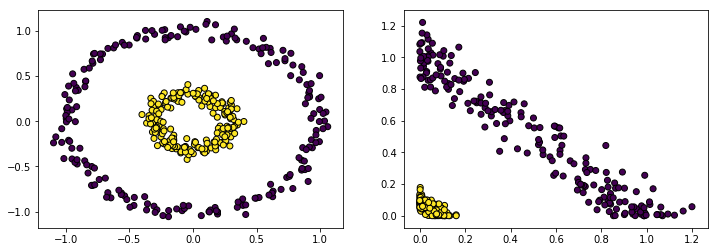

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

#mapping input attributes to input features
Z = np.power(X, 2) # feature engineering

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
plt.subplot(122)
plt.scatter(Z[:,0], Z[:,1], c=y, edgecolors='k')
plt.show()

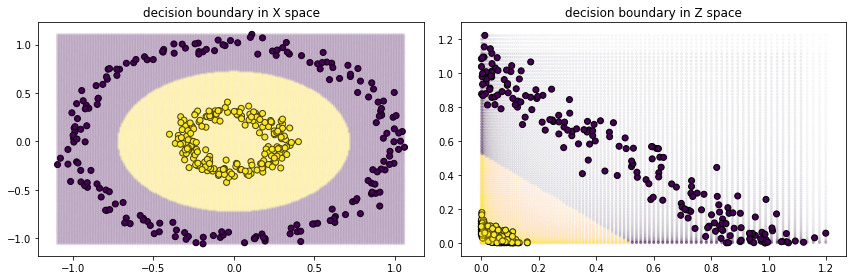

In [2]:
# decision logistic regression decision boundary in Z space
from sklearn.linear_model import LogisticRegression

# initalize model
model_z = LogisticRegression()
# fit model
model_z.fit(Z, y)

# mesh grid for boundary
h = 0.01
x1_min, x1_max = min(X[:,0]), max(X[:,0]) 
x2_min, x2_max = min(X[:,1]), max(X[:,1])
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
grid_X = np.array(zip(xx1.flatten(), xx2.flatten()))
grid_Z = np.power(grid_X, 2) 

y_pred = model_z.predict(grid_Z)

# decision boundary could be calculated as 
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
plt.scatter(grid_X[:, 0],
            grid_X[:, 1],
            marker='o',
            c=y_pred,
            s=5,
            alpha = 0.05)
plt.title("decision boundary in X space")

plt.subplot(1,2,2)
plt.scatter(Z[:,0], Z[:,1], c=y, edgecolors='k')
plt.scatter(grid_Z[:, 0],
            grid_Z[:, 1],
            marker='o',
            c=y_pred,
            s=5,
            alpha = 0.01)
plt.title("decision boundary in Z space")

plt.tight_layout()
plt.show()

**Actually some data is not linear separatable in original feature space but it can be separated in another feature space.**

We can do feature mapping to achieve this

e.g 
$\Phi(x) = [x, x^2, x^3]^T$, we map $x$ to space $[x, x^2, x^3]$, then we have non-linear features

### 3.3 Kernels

Once we have a feature mapping function we can define **kernel**, $K(x,z) = \Phi(x)^T \Phi(z)$

- generalized inner product, output is a number
- we can directly calculate $K(x,z) = \Phi(x)^T \Phi(z)$ without having to explicitly function $\Phi(x)$
    - save a lot of time, even though we know the form of $\Phi(x)$
- kernel trick can be applied in many algorithms, if there are inner products $<x, z>$, you can simply change it with $K(x,z)$, then you are using high dimensional features
- valid kernel(mercer's theorem)

### 3.4 Popular Kernels

#### 3.4.1 Linear kernel

definition: $K(x,z) = x^T z + c$
  - $\Phi(x) = [x_1, x_2, ..., \sqrt{c}]$

#### 3.4.2 Polynomial kernel

definition: $K(x,z) = (x^Tz+c)^d$ 
- mapping $p$ dimensional feature space to $C_{p+d}^{d}$  

e.g: if $d=2$
   - $\Phi(x) = [x_1^2, ..., \sqrt{2} x_1 x_2, ..., \sqrt{2c} x_1, ..., c]$

#### 3.4.3 RBF(gaussian) kernel

definition: $K(x,z) = e^{-\gamma |x - z|^2}$
  - mapping $p$ dimensional feature space **infinite** space
  - $\Phi(x) = e^{-\gamma x^2}[1, \sqrt{\frac{2\gamma}{1!}}x, \sqrt{\frac{(2\gamma)^2}{2!}}x^2, ...]$

### 3.5 How to choose kernel

1. no exact answer: different kernel actually have different feature space!!! So it depends on DATA
2. typically RBF is the best
3. if data set is not linear separatable, usually we need polynomial and RBF
4. cross validation
5. auto-select method: easy overfitting https://aran.library.nuigalway.ie/xmlui/bitstream/handle/10379/190/2006-ICANN-Howley-Madden.pdf?sequence=1

RBF as inifite Polynomial kernel
http://pages.cs.wisc.edu/~matthewb/pages/notes/pdf/svms/RBFKernel.pdf

useful link:
  - http://www.csie.ntu.edu.tw/~cjlin/talks/kuleuven_svm.pdf
  - http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/

### 3.6 Another View of Kernel


since kernel is generalized inner product, we can think $K(x,z) = \Phi(x)^T \Phi(z)$ is a measure of similarity, if $z$ is similar to $x$ the $K(x,z)$ is large, or it will be small.

Then in this condition, when you fit model using kernel instead of standard inner product, actually you are fitting model with their similarity.

## 4. SVM and Logistic Regression

### 4.1 Hinge Loss
- objective
    - $\text{max }_{w, b, \epsilon} M$
- constrains
    - $y_i (w^T x_i + b) \geq M(1-\epsilon_i), i = 1, ..., n$
    - $|w| = 1$ 
    - $\epsilon_i \geq 0$
    - $\sum{\epsilon_i} \leq C$
    
Rewrite the Problem, we can get

- objective
    - $\text{min }_{w,b} \sum_{i=1}^{n}\text{max}[0, 1-y_i(w^T x_i + b)] + \lambda |w|^2$
    
where $\lambda$ is a tunning parameter like $C$

This is **LOSS** + **PENALTY** form
We call $\text{max}[0, 1-y_i(w^T x_i + b)]$ hinge loss

### 4.2 Logistic Regression

- use negative likelihood loss function:
    - $\text{min }_{w,b} \sum_{i=1}^{n} log(1+e^{-y_i(w^Tx_i + b)}) + \lambda |w|^2$

http://www.robots.ox.ac.uk/~az/lectures/ml/2011/lect4.pdf

### 4.3 Difference

- **hinge loss doesn't care points above margin**
- If classes are well separated, SVMs tend to behave better than logistic regression
- If classes are not well separated, logistic regression is often preferred.

<img src="fig/loss.PNG" alt="Drawing" style="width: 500px;"/>

### 4.3 Pros & Cons

**Logistic Regression**
Pros
- Outputs have a nice probabilistic interpretation
- The algorithm can be regularized to avoid overfitting
- Logistic models can be updated easily with new data using stochastic gradient descent
Cons
- Tends to underperform when there are multiple or non-linear decision boundaries

**SVM**
Pros: 
- can model non-linear decision boundaries with kernels
- Fairly robust against overfitting, especially in high-dimensional space
Cons:
- Memory intensive
- Trickier to tune due to the importance of picking the right kernel & hyperparameters

**Tree/Random Forest**
Pros
- Robust to outliers, scalable
- able to naturally model non-linear decision boundaries
Cons
- Unconstrained, individual trees are prone to overfitting, but this can be alleviated by ensemble methods